In [49]:
import tensorflow as tf # Tensorflow is a neural network and deep neural network library
from tensorflow import keras # Keras is a high-level wrapper that makes working with tensorflow easier
from tensorflow.keras import layers # Layers contains different types of layers such as Dense, Convolutional, Recurrent

import numpy as np
import pandas as pd

In [50]:
# load dataset
df = pd.read_csv("new_dataset_0.csv")
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Lyrics
0,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0,Jaded and demented\r\nIn the attic the bonemen...
1,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1,I don't wanna rush this thing\r\nI don't wanna...
2,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.000000,0.0759,0.389,153.105,253640,4,19.65701,11,1,Stopped to have a few at five\r\nNow you're cr...
3,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.000000,0.1150,0.344,124.213,314286,3,32.66343,16,0,I want to know your plans\r\nAnd how involved ...
4,Amarillo Sky,Jason Aldean,spotify:track:0axUHkhMMY0YSC1jFBVWqv,0.491,0.776,2,-3.887,1,0.0393,0.314000,0.000000,0.1460,0.428,154.988,202547,4,37.86861,9,1,He gets up before the dawn\r\nPacks a lunch an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,Postcards From Hell,The Wood Brothers,spotify:track:72i7dwVrHdfDnr3qmINh5U,0.465,0.242,9,-10.460,1,0.0298,0.955000,0.022300,0.1260,0.315,102.812,284862,4,35.07251,14,0,"I know a man who sings the blues\r\nYeah, he p..."
3070,(You Drive Me) Crazy,Britney Spears,spotify:track:1DSJNBNhGZCigg9ll5VeZv,0.748,0.939,0,-4.288,0,0.0341,0.053400,0.000000,0.3200,0.960,104.001,198067,4,19.29426,9,1,"Baby, I'm so into you\r\nYou got that somethin..."
3071,The Anthem,Good Charlotte,spotify:track:0BRHnOFm6sjxN1i9LJrUDu,0.494,0.939,1,-3.127,1,0.1260,0.006660,0.000000,0.1390,0.893,177.751,175093,4,15.89251,11,1,Yeah\r\nHere we go\r\n\r\nIt's a new day\r\nBu...
3072,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,0.667,0.627,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,232560,4,40.87045,10,1,"Storming outside, rain\r\nShe keeps me home\r\..."


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,-0.226412,0.004610,0.003211,-0.045523,0.047798,0.107120,-0.311415,-0.164489,0.570520,-0.250674,-0.119229,0.170190,-0.076949,-0.074467,0.448750
energy,-0.226412,1.000000,-0.012244,0.670537,-0.082126,0.167983,-0.642413,0.107066,0.232279,0.148454,0.140458,-0.067178,0.032054,0.019268,-0.091733,-0.206257
key,0.004610,-0.012244,1.000000,-0.030982,-0.124708,0.010927,0.002328,-0.002773,-0.037782,0.007656,-0.009917,0.019913,0.026868,-0.002144,0.014105,-0.011328
loudness,0.003211,0.670537,-0.030982,1.000000,-0.011489,0.055389,-0.521196,-0.191745,0.103525,0.177276,0.082130,-0.101221,0.059399,-0.009528,-0.083922,0.160207
mode,-0.045523,-0.082126,-0.124708,-0.011489,1.000000,-0.113615,0.076806,-0.075389,-0.004318,-0.035700,0.022219,-0.061066,-0.011346,-0.047840,-0.030223,0.127666
speechiness,0.047798,0.167983,0.010927,0.055389,-0.113615,1.000000,-0.064485,-0.005102,0.156167,0.068749,0.023368,-0.024706,-0.002302,0.022095,-0.016236,-0.082051
acousticness,0.107120,-0.642413,0.002328,-0.521196,0.076806,-0.064485,1.000000,-0.037734,-0.125793,-0.059983,-0.090317,-0.004847,-0.032991,-0.018218,0.011597,0.064292
instrumentalness,-0.311415,0.107066,-0.002773,-0.191745,-0.075389,-0.005102,-0.037734,1.000000,0.022924,-0.246205,0.001691,0.160057,-0.096678,0.079372,0.094981,-0.431805
liveness,-0.164489,0.232279,-0.037782,0.103525,-0.004318,0.156167,-0.125793,0.022924,1.000000,-0.042167,0.053532,0.024087,-0.000239,0.045273,0.005509,-0.143832
valence,0.570520,0.148454,0.007656,0.177276,-0.035700,0.068749,-0.059983,-0.246205,-0.042167,1.000000,-0.021495,-0.188254,0.181326,-0.075143,-0.133749,0.270267


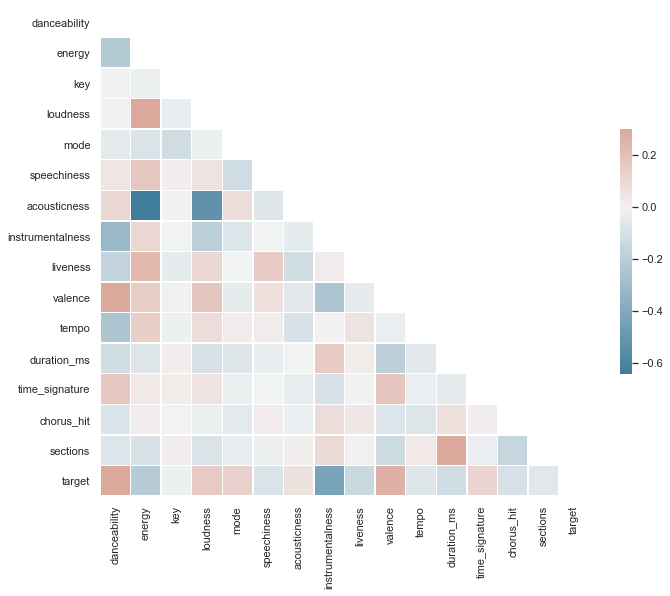

In [51]:
#  data visualisation

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

In [52]:
# track	,artist	,uri,	danceability,	energy,	key,	loudness,	mode,	speechiness,	acousticness,	instrumentalness,	liveness,	valence,	tempo,	duration_ms,	time_signature,	chorus_hit,	sections,	target,	Lyrics
# according to the map:
# energy, speechiness instrumentalness, liveness, chorus_hit, danceability, loudness, mode, acousticness, valence, time_signature, 
df = df.drop(["track", "artist", "uri", "key", "tempo","duration_ms", "sections", "Lyrics"], axis=1)

In [53]:
# df["Length (Duration)"] = df["Length (Duration)"].str.replace(r',', '')


In [54]:
# print(df.shape)
# change popularity score from continuous data to binary data
# df["Popularity Score"] = np.where(df["Popularity Score"] <= 63, 0, 1)


In [55]:
df

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,chorus_hit,target
0,0.162,0.836,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,4,65.32887,0
1,0.630,0.764,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,4,22.62384,1
2,0.481,0.786,-5.654,1,0.0288,0.053800,0.000000,0.0759,0.389,4,19.65701,1
3,0.647,0.324,-9.679,1,0.0377,0.354000,0.000000,0.1150,0.344,3,32.66343,0
4,0.491,0.776,-3.887,1,0.0393,0.314000,0.000000,0.1460,0.428,4,37.86861,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3069,0.465,0.242,-10.460,1,0.0298,0.955000,0.022300,0.1260,0.315,4,35.07251,0
3070,0.748,0.939,-4.288,0,0.0341,0.053400,0.000000,0.3200,0.960,4,19.29426,1
3071,0.494,0.939,-3.127,1,0.1260,0.006660,0.000000,0.1390,0.893,4,15.89251,1
3072,0.667,0.627,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,4,40.87045,1


In [56]:
y = df["target"]
x = df.drop(["target"],axis=1)
print(x)

      danceability  energy  loudness  mode  speechiness  acousticness  \
0            0.162   0.836    -3.009     1       0.0473      0.000111   
1            0.630   0.764    -4.353     1       0.0275      0.363000   
2            0.481   0.786    -5.654     1       0.0288      0.053800   
3            0.647   0.324    -9.679     1       0.0377      0.354000   
4            0.491   0.776    -3.887     1       0.0393      0.314000   
...            ...     ...       ...   ...          ...           ...   
3069         0.465   0.242   -10.460     1       0.0298      0.955000   
3070         0.748   0.939    -4.288     0       0.0341      0.053400   
3071         0.494   0.939    -3.127     1       0.1260      0.006660   
3072         0.667   0.627   -10.488     0       0.0654      0.097200   
3073         0.691   0.389   -10.125     1       0.0653      0.255000   

      instrumentalness  liveness  valence  time_signature  chorus_hit  
0             0.004570    0.1740    0.300          

In [57]:
"""
Neural Network Model
"""

'\nNeural Network Model\n'

In [58]:
def make_model(input_shape, num_classes): 
    inputs = keras.Input(shape=input_shape)
    # print(inputs)
    # standardize
    #  what if i dont flatten?
    x = inputs
    # hidden layers sigmoid
    x = layers.Dense(8, activation="sigmoid")(x)
    x = layers.Dense(4, activation="sigmoid")(x)
    x = layers.Dense(1, activation="sigmoid")(x)
    # Write dense layers with non-linear activation here.
    # activation = "softmax"
    # units = num_classes # num_class would be different for MNIST.
    # outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, x)

image_size = (11)
model = make_model(input_shape=image_size, num_classes=1)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [59]:
import numpy as np
from sklearn.model_selection import train_test_split

# Part 3
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

print(len(x_train))
print(len(x_val))
print(len(x_test))

1505
923
646


In [60]:
epochs = 5

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5, # You can change it
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy", # You would need to change here for MNIST; use categorical crossentropy
    metrics=["accuracy"],
)
x_train = np.asarray(x_train).astype(np.float) # data in float
y_train = np.asarray(y_train).astype(np.int)
x_test = np.asarray(x_test).astype(np.float) # data in float
# x_test = np.asarray(x_test).astype(np.int)
y_test = np.asarray(y_test).astype(np.int)
x_val = np.asarray(x_val).astype(np.float) # data in float
y_val = np.asarray(y_val).astype(np.int)

model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=8,
    callbacks=callbacks,
    validation_data=(x_val,y_val),
)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/5


<ipython-input-60-29c3a1c5d20b>:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = np.asarray(x_train).astype(np.float)
<ipython-input-60-29c3a1c5d20b>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = n

189/189 [==============================] - 1s 3ms/step - loss: 0.7038 - accuracy: 0.5056 - val_loss: 0.6601 - val_accuracy: 0.6381
Epoch 2/5
189/189 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6120 - val_loss: 0.6523 - val_accuracy: 0.6371
Epoch 3/5
189/189 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6113 - val_loss: 0.6487 - val_accuracy: 0.6371
Epoch 4/5
189/189 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6113 - val_loss: 0.6428 - val_accuracy: 0.6381
Epoch 5/5
21/21 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6285
Test accuracy: 0.62848299741745


In [61]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [62]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
"""
Ignore the section below
"""

In [ ]:
import numpy as np
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db


def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')


def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X


def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses


def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)


In [ ]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy
accuracy(X, y_hat=predict(X))